In [3]:
import funzioni02 as f2
import numpy as np
import datetime
import qiskit.ignis.mitigation.measurement as mc
from qiskit import Aer, assemble, QuantumCircuit, QuantumRegister, ClassicalRegister, IBMQ, transpile, execute
from qiskit.providers.aer import AerSimulator, QasmSimulator
from qiskit.opflow import Zero, One, I, X, Y, Z
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.quantum_info import state_fidelity
import matplotlib.pyplot as plt

IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-community', group='ibmquantumawards', project='open-science-22')

sim_noisy_jakarta = QasmSimulator.from_backend(provider.get_backend('ibmq_jakarta'))
backend_sim_jakarta = sim_noisy_jakarta 
backend = provider.get_backend('ibmq_jakarta')
backend_sim = Aer.get_backend('qasm_simulator')

In [4]:
jobs_=backend.jobs(limit=30, start_datetime= "2022-03-9", end_datetime="2022-03-11")

job="6229eb5ba9086d802b258111"

job_=backend.retrieve_job(job)
job_cal_our =backend.retrieve_job("6229eb73eee8da3733568681")


In [5]:
job_cal=jobs_[1]
job_cal_our=jobs_[0]
jobs = jobs_[2:]

In [6]:
j=jobs[4]
len(j.result().get_counts())
c=j.circuits()

In [7]:
qc=c[26]
qc.remove_final_measurements()
qc.draw()

»
q_0: ───────────────────────────────────────────────────────────────────»
     ┌─────────┐    ┌────┐    ┌─────────┐     ┌────┐┌────────────┐┌────┐»
q_1: ┤ Rz(π/2) ├────┤ √X ├────┤ Rz(π/2) ├──■──┤ √X ├┤ Rz(3.1158) ├┤ √X ├»
     └─────────┘    └────┘    └─────────┘  │  └────┘└────────────┘└────┘»
q_2: ──────────────────────────────────────┼────────────────────────────»
        ┌───┐   ┌────────────┐           ┌─┴─┐┌────┐┌────────────┐┌────┐»
q_3: ───┤ X ├───┤ Rz(1.2576) ├───────────┤ X ├┤ √X ├┤ Rz(3.1158) ├┤ √X ├»
        └───┘   └────────────┘           └───┘└────┘└────────────┘└────┘»
q_4: ───────────────────────────────────────────────────────────────────»
        ┌───┐   ┌────────────┐                                          »
q_5: ───┤ X ├───┤ Rz(3.3166) ├──────────────────────────────────────────»
        └───┘   └────────────┘                                          »
q_6: ───────────────────────────────────────────────────────────────────»
                                                                        »
«                                                    ┌───┐                    »
«q_0: ───────────────────────────────────────────────┤ X ├────────────────────»
«     ┌────────┐       ┌─────────┐  ┌────┐┌─────────┐└─┬─┘                    »
«q_1: ┤ Rz(-π) ├──■────┤ Rz(π/2) ├──┤ √X ├┤ Rz(π/2) ├──■────■─────────────────»
«     └────────┘  │    └─────────┘  └────┘└─────────┘     ┌─┴─┐               »
«q_2: ────────────┼───────────────────────────────────────┤ X ├───────────────»
«     ┌────────┐┌─┴─┐┌─────────────┐┌────┐┌─────────┐     ├───┴┐┌────────────┐»
«q_3: ┤ Rz(-π) ├┤ X ├┤ Rz(0.33583) ├┤ √X ├┤ Rz(π/2) ├──■──┤ √X ├┤ Rz(2.0516) ├»
«     └────────┘└───┘└─────────────┘└────┘└─────────┘  │  └────┘└────────────┘»
«q_4: ─────────────────────────────────────────────────┼──────────────────────»
«                                                    ┌─┴─┐┌────┐┌────────────┐»
«q_5: ───────────────────────────────────────────────┤ X ├┤ √X ├┤ Rz(2.0516) ├»
«                                                    └───┘└────┘└────────────┘»
«q_6: ────────────────────────────────────────────────────────────────────────»
«                                                                             »
«                                                                         
«q_0: ────────────────────────────────────────────────────────────────────
«                                                          ┌───┐     ┌───┐
«q_1: ─────────────────────────────────────────────────────┤ X ├──■──┤ X ├
«                                                          └─┬─┘┌─┴─┐└─┬─┘
«q_2: ───────────────────────────────────────────────────────┼──┤ X ├──┼──
«     ┌────┐┌────────┐       ┌─────────┐  ┌────┐┌─────────┐  │  └───┘  │  
«q_3: ┤ √X ├┤ Rz(-π) ├──■────┤ Rz(π/2) ├──┤ √X ├┤ Rz(π/2) ├──■─────────■──
«     └────┘└────────┘  │    └─────────┘  ├───┬┘└─────────┘               
«q_4: ──────────────────┼─────────────────┤ X ├───────────────────────────
«     ┌────┐┌────────┐┌─┴─┐┌─────────────┐└─┬─┘                           
«q_5: ┤ √X ├┤ Rz(-π) ├┤ X ├┤ Rz(-3.3166) ├──■─────────────────────────────
«     └────┘└────────┘└───┘└─────────────┘                                
«q_6: ────────────────────────────────────────────────────────────────────
«

In [56]:
qs = []
#for j in jobs:
c=jobs[12].circuits()
print(jobs[9].job_id())
qc=c[26]
qc.remove_final_measurements()
M=f2.matrix_from_cirquit(c[26])

for i in range(2**7):
    if M[i*2**7]!=0:
        print(i)
        print(M[i*2**7])

6229eb60a9086db17c258112
15
9.87301e-5 + 0.0021063946*I
51
-0.0001020679 - 0.0010531973*I
60
-0.9999966622 - 0.0010531973*I


In [57]:
U=f2.Trotter_N_approx(steps=60, tempo=np.pi, precision=40)

U[6*8+6]

0.999975239210805506957680934051547568861 + 0.002861052917293489512720540155327507444995*I

In [59]:
from sympy import Symbol, Matrix, cos, sin, eye,exp
from sympy.physics.quantum import TensorProduct as Tp

q = Symbol("q", positive = True) #q=2*t/N, t=tempo, N=steps

cx_01= Matrix([
[1,0,0,0],
[0,0,0,1],
[0,0,1,0],
[0,1,0,0]
])

m = Matrix([
[exp(-1j*q),0,0,0],
[0,exp(-1j*q),0,0],
[0,0,cos(q),-1j*sin(q)],
[0,0,-1j*sin(q),cos(q)]
])


Trotter_step=Tp(eye(2),cx_01*m*cx_01)*Tp(cx_01*m*cx_01,eye(2))
U= eye(8)

min = 1
i_min = 0

for i in range(100):
    if i%10==0:
        print(i)
    U= eye(8)
    for _ in range(i):
        # print(steps,i)
        U=U*Trotter_step
        U=U.subs(q,2*np.pi/i)
        U=U.evalf(40)

    if min>abs(U[6*8+6]+M[60*2**7]):
        min=abs(U[6*8+6]+M[60*2**7])
        print(min)
        i_min=i

print(i_min)

0
0.00105320258907588
0.001053202589075631566952879839300978402752
0.001053202589075631566952879839300930872503
10
20
30
40
50
60
70
0.001050786576685585936553661915027497805391
0.0009920794533597891357471701387639395159985
0.0009357937442775421861949043320122582845841
0.0008817981924610985722469502309504849131745
0.0008299703092387992095057549050330862428281
0.0007801956811183479698604684004519524463133
0.0007323673397097877961312342009379030019452
0.0006863851882326997235129111565871432050911
0.0006421554788677738918781635834278935896098
0.0005995903358797496962049327238661895043544
80
0.0005586073199892269646287848227577816005098
0.0005191290299539796651956214923934417518631
0.0004810827377939300808430000662894326684291
0.0004444000544438966136387364616478100643803
0.0004090166229584664896975370012687965580689
0.0003748718367289206895025823307382367135379
0.0003419085803877101771045805714385531453709
0.0003100729913559318939886932992743155435816
0.00027931424015758483697948681120706

In [ ]:
0.0002495843278526379385385177936530310291722

In [65]:
state_lables = f2.bin_list(6)
qcs_na_=[]

qcs_na=f2.column_evolution_tomo(69, np.pi, 40, initial_state='110', check=[0])

meas_fitter = mc.CompleteMeasFitter(job_cal.result(), state_labels=state_lables)
meas_fitter_our = mc.CompleteMeasFitter(job_cal_our.result(), state_labels=state_lables)

target_state = (One^One^Zero).to_matrix()

reps=2
n_s=12

fids=np.zeros([n_s,reps,4])
fids_mean=np.zeros([n_s,4])
fids_dev=np.zeros([n_s,4])

i=0
for job in jobs:
    
    new_res, new_res_nm = f2.mitigate(job.result(), Measure_Mitig="yes", ancillas_conditions=['011','110','101'], meas_fitter=meas_fitter)
    new_res_our, new_res_nm = f2.mitigate(job.result(), Measure_Mitig="yes", ancillas_conditions=['011','110','101'], meas_fitter=meas_fitter_our)
    new_res_not_mitigated = f2.mitigate(job.result(), Measure_Mitig="no", ancillas_conditions=f2.bin_list(3))


    fid = f2.fidelity_count(new_res_not_mitigated, qcs_na, target_state)
    fids[i%n_s][i//n_s][0] = fid

    fid = f2.fidelity_count(new_res_nm, qcs_na, target_state)
    fids[i%n_s][i//n_s][1] = fid

    fid = f2.fidelity_count(new_res, qcs_na, target_state)
    fids[i%n_s][i//n_s][2] = fid

    fid = f2.fidelity_count(new_res_our, qcs_na, target_state)
    fids[i%n_s][i//n_s][3] = fid
    
    i+=1

In [66]:
for i in range(4):
    for j in range(n_s):
        fids_mean[j,i]=np.mean(fids[j,:,i])
        fids_dev[j,i]=np.std(fids[j,:,i])

In [67]:
target_state = (One^One^Zero).to_matrix()

fid = f2.fidelity_count(new_res , qcs_na, target_state)

In [68]:
fids_mean


array([[0.82127156, 0.88269397, 0.974296  , 0.99110497],
       [0.82251129, 0.88322831, 0.97580879, 0.99032558],
       [0.82385578, 0.8823685 , 0.97660392, 0.99127927],
       [0.80819774, 0.87507113, 0.9659827 , 0.98705541],
       [0.79970866, 0.86538385, 0.95426036, 0.9823526 ],
       [0.82016748, 0.879819  , 0.97334493, 0.99100099],
       [0.81279922, 0.87623135, 0.96993873, 0.99287396],
       [0.80986588, 0.8672094 , 0.9583615 , 0.99131904],
       [0.79077297, 0.84460914, 0.93247343, 0.9730019 ],
       [0.72910365, 0.77376102, 0.85333071, 0.89000994],
       [0.51371145, 0.54232741, 0.59134106, 0.6105425 ],
       [0.24797193, 0.25618479, 0.27618227, 0.28033418]])

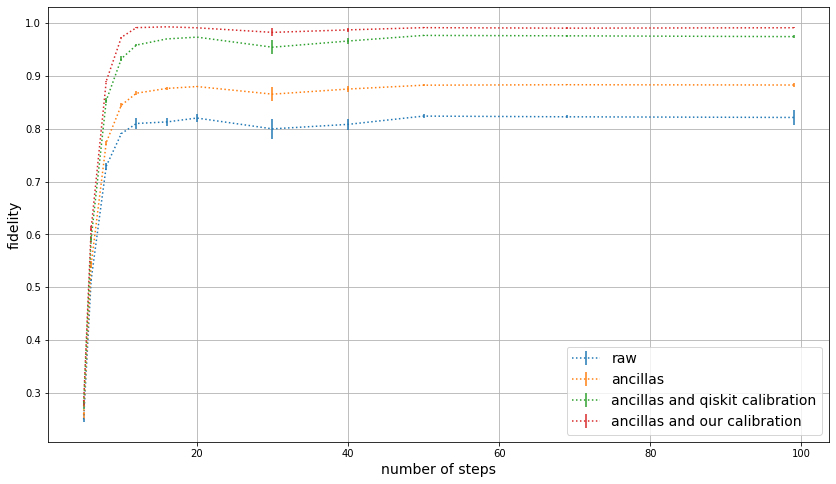

In [80]:

steps = [5,6,8,10,12,16,20,30,40,50,69,99]
steps.reverse()

labels=["raw","ancillas","ancillas and qiskit calibration","ancillas and our calibration"]
plt.figure(figsize=(14,8))

for i in range(4):
    plt.errorbar(steps,list(fids_mean[:,i]),list(fids_dev[:,i]),linestyle=':',label=labels[i])

plt.legend(fontsize=14)
plt.xlabel("number of steps",fontsize=14)
plt.ylabel("fidelity",fontsize=14)
plt.grid()
plt.show()